In [ ]:
import pandas as pd
import pickle
import numpy as np
from numpy import sort

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATA_PATH = 'data'

# Load Data

In [ ]:
def load_data(data,is_df=False,size=None):
    df = None
    
    if is_df:
        df = pd.read_csv(os.path.join(DATA_PATH, data))
    else:
        df = data
    df = shuffle(df)
    
    if size:
        df = df.sample(n=size, random_state=1)
    X = df[[
        'TPV_6M',
        'TS',
        'COVER_DAY_6M',
        'PT_FIX_SPEED_UL_COVER_6M',
        'TOTAL_MONTH',
        'SOF_OTHER_FREQ_6M',
        'PT_FIX_SPEED_NS_COVER_6M',
        'V_CODE_6M'
    ]]
#     X = df.drop([
#         'RC_FLAG',
#         'TARGET_MONTH',
#         'MOBILE',
#         'PT_VOICE_COVER_6M',
#         'PT_FIX_SPEED_NS_FREQ_6M',
#         'PT_FIX_SPEED_UL_FREQ_6M',
#         'PT_FULL_SPEED_NS_FREQ_6M',
#         'PT_BURST_SPEED_FREQ_6M',
#         'PT_BUNDLE_APP_FREQ_6M',
#         'PT_OTHER_FREQ_6M'
#     ],axis=1)
    y = df[['RC_FLAG']]
    
    mobile = df[['MOBILE']]
    return X, y, mobile

In [10]:
X,y,mobile = load_data('EXISTING_RC_6M.csv',500000)

In [11]:
y['RC_FLAG'].value_counts()

0    321819
1    178181
Name: RC_FLAG, dtype: int64

In [12]:
df = pd.read_csv(os.path.join(DATA_PATH,'EXISTING_RC_6M.csv'))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(400000, 8)
(100000, 8)


In [15]:
y_train['RC_FLAG'].value_counts()

0    257356
1    142644
Name: RC_FLAG, dtype: int64

# Boxplot

# Feature Selection

In [16]:
def remove_outlier(df, col_name):
    q3 = df[col_name].quantile(0.75)
    q1 = df[col_name].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    if lower < 0:
        lower = 0
    df = df[(df[col_name] >= lower) & (df[col_name] <= upper)]
    return df

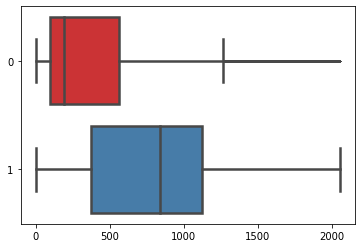

In [17]:
fig, ax = plt.subplots()
sns.boxplot(x='TPV_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TPV_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

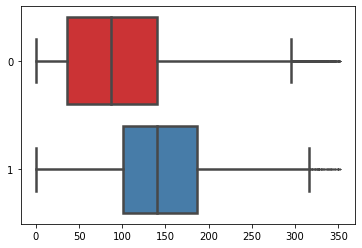

In [18]:
fig, ax = plt.subplots()
sns.boxplot(x='TS', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TS'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

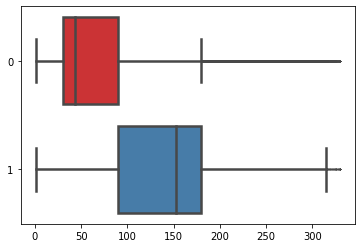

In [19]:
fig, ax = plt.subplots()
sns.boxplot(x='COVER_DAY_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'COVER_DAY_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

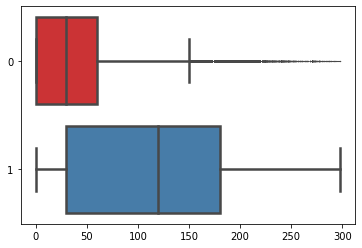

In [20]:
fig, ax = plt.subplots()
sns.boxplot(x='PT_FIX_SPEED_UL_COVER_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'PT_FIX_SPEED_UL_COVER_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

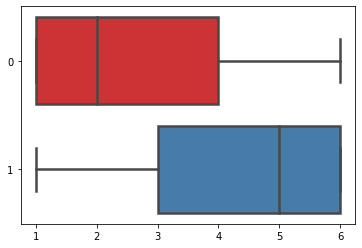

In [21]:
fig, ax = plt.subplots()
sns.boxplot(x='TOTAL_MONTH', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'TOTAL_MONTH'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

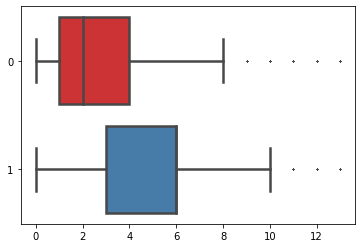

In [22]:
fig, ax = plt.subplots()
sns.boxplot(x='SOF_OTHER_FREQ_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'SOF_OTHER_FREQ_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

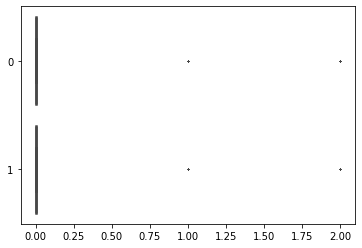

In [23]:
fig, ax = plt.subplots()
sns.boxplot(x='PT_FIX_SPEED_NS_COVER_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'PT_FIX_SPEED_NS_COVER_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

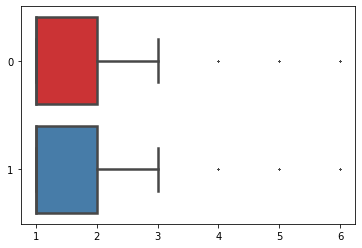

In [24]:
fig, ax = plt.subplots()
sns.boxplot(x='V_CODE_6M', y='RC_FLAG', hue='RC_FLAG', data=remove_outlier(df, 'V_CODE_6M'), palette='Set1', orient='h', fliersize=0.4,linewidth=2.5,dodge=False) \
    .set(
        xlabel='',
        ylabel=''
    )
ax.legend_.remove()

### Recursive Elimation

In [ ]:
model = xgb.XGBClassifier(verbosity = 0)
model.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax,importance_type="weight")
plt.show()

In [ ]:
model = xgb.XGBClassifier(verbosity = 0,importance_type="weight")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (acc_score * 100))

import numpy as np
thresh = np.sort(model.feature_importances_)

for t in thresh:
    select = SelectFromModel(model,threshold=t,prefit=True)
    select_xtrain = select.transform(X_train)

    select_model = xgb.XGBClassifier(verbosity = 0)
    select_model.fit(select_xtrain,y_train)

    select_xtest = select.transform(X_test)
    y_pred_new = select_model.predict(select_xtest)
    z = [round(value) for value in y_pred_new]
    acc_score = accuracy_score(y_test,z)
    pre_score = precision_score(y_test,z)
    rec_score = recall_score(y_test,z)
    f_score = f1_score(y_test, z)

    print('Thresh=%.3f, n=%d, Accuracy: %.2f%% F-Score: %.2f%% Precision: %.2f%% Recall: %.2f%%' % (t,select_xtest.shape[1],acc_score*100,f_score*100,pre_score,rec_score))

In [56]:
importances = list(zip(model.feature_importances_, X_train))
importances.sort(reverse=True)
print('Feature,Score')
for item in importances[:8]:
    print(','.join([str(item[1]), str(item[0])]))

Feature,Score
TPV_6M,0.2288578
TS,0.21716434
COVER_DAY_6M,0.12361662
PT_FIX_SPEED_UL_COVER_6M,0.119231574
SOF_OTHER_FREQ_6M,0.082689494
V_CODE_6M,0.082063064
PT_FIX_SPEED_NS_COVER_6M,0.07412821
TOTAL_MONTH,0.072248906


# Xgboost Model

In [25]:
model = xgb.XGBClassifier(verbosity = 0,importance_type='weight')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='weight', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [26]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
pred_prob = model.predict_proba(X_test)

In [27]:
acc = accuracy_score(y_test, predictions)
f1_acc = f1_score(y_test, predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)

In [28]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)
print('Precision :', pre_score)
print('Recall :', rec_score)

ACCURACY : 0.83849
F1 SCORE : 0.7427160493827161
Precision : 0.8558631323885748
Recall : 0.6559923460055717


In [29]:
importances = list(zip(model.feature_importances_, X_train))
importances.sort(reverse=True)
print('Feature,Score')
for item in importances:
    print(','.join([str(item[1]), str(item[0])]))

Feature,Score
TPV_6M,0.2274071
TS,0.21473818
PT_FIX_SPEED_UL_COVER_6M,0.1245777
COVER_DAY_6M,0.12056588
SOF_OTHER_FREQ_6M,0.08530405
PT_FIX_SPEED_NS_COVER_6M,0.0789696
V_CODE_6M,0.078125
TOTAL_MONTH,0.0703125


# Confusion Matrix

In [30]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

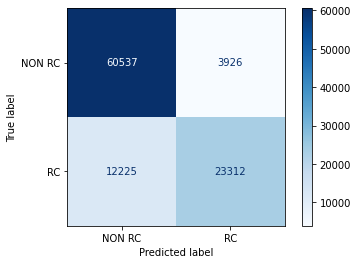

In [31]:
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=['NON RC', 'RC'],
                             cmap=plt.cm.Blues,)

In [32]:
confusion_matrix(y_test, y_pred)

array([[60537,  3926],
       [12225, 23312]])

In [33]:
disp.confusion_matrix

array([[60537,  3926],
       [12225, 23312]])

# ROC AUC

In [34]:
from sklearn.metrics import plot_roc_curve

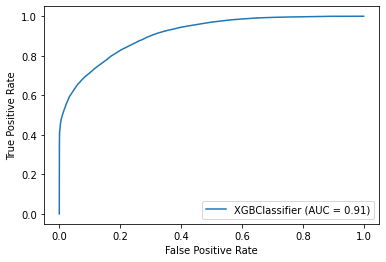

In [35]:
plot_roc_curve(model, X_test, y_test) 

# Lift Chart

In [68]:
import scikitplot as skplt

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, pred_prob)
plt.show()

In [ ]:
skplt.metrics.plot_lift_curve(y_test, pred_prob)
plt.show()

# Save model

In [75]:
model.save_model('model_result/existing_rc.json')

# Evaluate

In [79]:
%%bigquery df_eval
SELECT
    * EXCEPT(RC_FLAG,ACTUAL_RC_FLAG), ACTUAL_RC_FLAG AS RC_FLAG
 
FROM `acm-bi.Analysis.SA_VAS_RECURRING_EXISTING_JAN21_RESULT`

In [80]:
# X_eval, y_eval, mobile = load_data('EXISTING_RC_JAN21.csv')
X_eval, y_eval, mobile = load_data(df_eval)

In [81]:
X_eval.shape

(4204077, 8)

In [82]:
y_eval['RC_FLAG'].value_counts()

0    2714203
1    1489874
Name: RC_FLAG, dtype: int64

In [83]:
X_eval.shape

(4204077, 8)

In [84]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('model_result/existing_rc.json')

In [85]:
pred = model.predict(X_eval)
predictions_eval = np.array([round(value) for value in pred])

In [86]:
acc = accuracy_score(y_eval, predictions_eval)
f1_acc = f1_score(y_eval, predictions_eval)

In [87]:
print('ACCURACY :', acc)
print('F1 SCORE :', f1_acc)

ACCURACY : 0.804390832993782
F1 SCORE : 0.6925765067136599


In [88]:
print(np.count_nonzero(predictions_eval == 0))
print(np.count_nonzero(predictions_eval == 1))

3018957
1185120


In [89]:
confusion_matrix(y_eval, predictions_eval)

array([[2455402,  258801],
       [ 563555,  926319]])

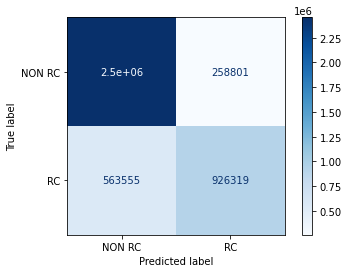

In [90]:
disp = plot_confusion_matrix(model, X_eval, y_eval,
                             display_labels=['NON RC', 'RC'],
                             cmap=plt.cm.Blues,)

In [91]:
disp.confusion_matrix

array([[2455402,  258801],
       [ 563555,  926319]])

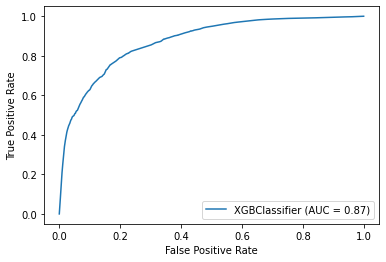

In [92]:
plot_roc_curve(model, X_eval, y_eval) 

In [93]:
prob_result = model.predict_proba(X_eval)
skplt.metrics.plot_lift_curve(y_eval, prob_result)
plt.show()

NameError: name 'skplt' is not defined

# Prob predict

In [103]:
prob_result = model.predict_proba(X_eval)
df_eval = pd.concat([mobile,X_eval, y_eval],axis=1)
df_eval['PROB'] = prob_result[:,1:]
df_eval['PREDICT_FLAG'] = np.array([round(value) for value in pred]) 

In [104]:
df_eval.head()

MOBILE   TPV_6M        TS  COVER_DAY_6M  PT_FIX_SPEED_UL_COVER_6M  \
4386237  841230397   433.13   86.6260           121                        60   
4240161  957074043   841.11  210.2775           120                        90   
2746527  962651883   186.92  186.9200            30                        30   
601997   836839491  1270.52  158.8150           190                       180   
2131796  647767628     0.00    0.0000            30                         0   

         TOTAL_MONTH  SOF_OTHER_FREQ_6M  PT_FIX_SPEED_NS_COVER_6M  V_CODE_6M  \
4386237            2                  3                         0          3   
4240161            3                  4                         0          2   
2746527            1                  1                         0          1   
601997             6                  6                         0          3   
2131796            1                  1                         0          1   

         RC_FLAG      PROB  PREDICT_FLAG  
4386237        1  0.557617             1  
4240161        1  0.820255             1  
2746527        1  0.301892             0  
601997         0  0.977424             1  
2131796        0  0.017494             0

In [ ]:
df_eval.to_csv(os.path.join(DATA_PATH, 'existing_rc_result.csv'),index=False)

# Feb Prediction

In [36]:
%%bigquery mar_df
SELECT
    * EXCEPT(TARGET_MONTH,FIRST_MONTH,LAST_MONTH,RC_RECENCY)
FROM acm-bi.Analysis.SA_VAS_RECURRING_EXISTING_MAR21

In [37]:
bst = xgb.Booster({'nthread': 4})
bst.load_model('model_result/existing_rc.json')

In [39]:
mar_df.shape

(5679992, 9)

In [81]:
prob_result = model.predict_proba(mar_df.drop(['MOBILE'],axis=1))

In [82]:
mar_df['PROB'] = prob_result[:,1:]

In [40]:
X.shape

(0, 8)

In [83]:
mar_df.to_csv(os.path.join(DATA_PATH, 'rc_mar_result.csv'),index=False)